# Part 3 Lecture 177 Data Preprocessing

##### Logistic Regression for Data Classification

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Example 1:  Predict Student/Pass Fail using study hours per week

#### The average weekly hours in a particular Computer Science Course for a group of college students are recorded as variable \'Hours'.
#### Each student\'s PASS/FAIL is recorded as variable Y.

### Question:
#### Can you predict if a student will PASS/FAIL the course based on the student\'s study hours per week?

###### Step 1:  Create a random \'toy\' sample

###### 20 fails
###### 20 passes
###### Fails have a mean of 20 hours of study per week (std = 5 hours)
###### Passes have a mean of 30 hours of study per week (std = 5 hours)

In [3]:
# Create the dataset:

x1 = np.random.normal(20, 5, 20)
x2 = np.random.normal(30, 5, 20)

fail_df = pd.DataFrame(
    {
        'Hours':x1,
        'Result': 0,
        'Grade': 'FAIL'
        }
    )

pass_df = pd.DataFrame(
    {
        'Hours':x2,
        'Result': 1,
        'Grade': 'Pass'
        }
    )

# Combine the frames and shuffle the rows randomly

data_1 = pd.concat([pass_df, fail_df]).sample(frac=1)

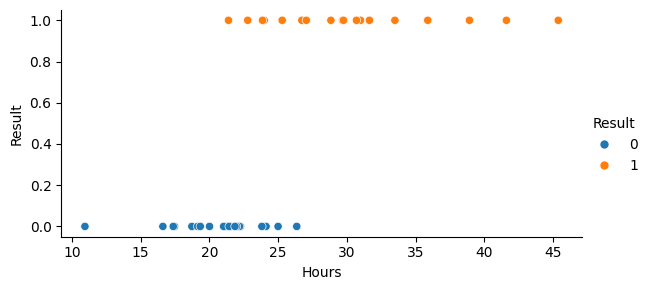

In [7]:
# Plot the data:

rel_1 = sns.relplot(data=data_1, x='Hours', y='Result', hue = 'Result', height = 3, aspect = 2)
rel_1.fig.savefig(r'output/relplot_students.png')

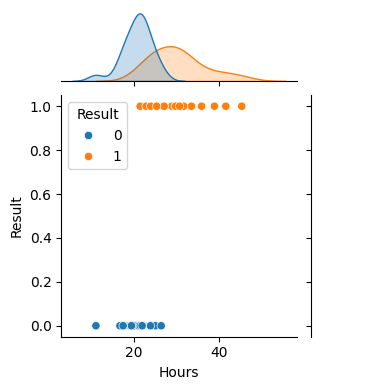

In [9]:
# Plot with jointplot

jntplot_1 = sns.jointplot(data=data_1, x='Hours', y='Result', hue='Result', height=4, ratio=3)
jntplot_1.fig.savefig(r'output/student_jntplt_1.png')

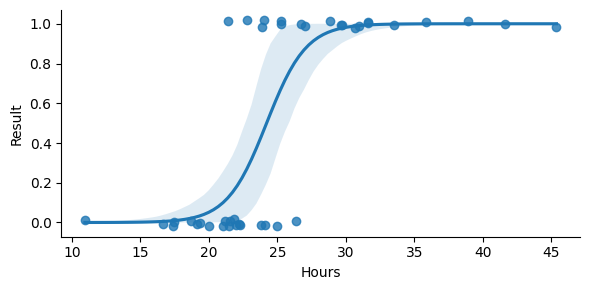

In [11]:
# Plot the logistic regression:
# Jitter set to 0.02 to move dots around a little to show them all see below for jitter = 0
l_reg = sns.lmplot(data=data_1, x='Hours', y='Result', height=3, aspect=2, logistic=True, y_jitter=0.02)
l_reg.fig.savefig(r'output/lmplot_Student_1.png')

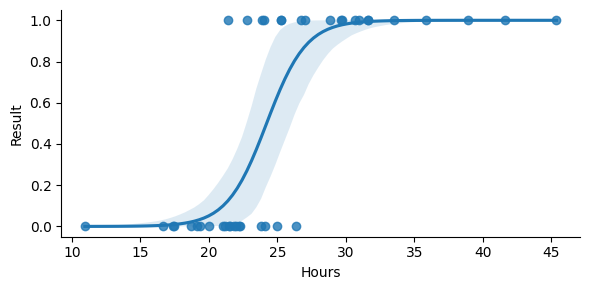

In [12]:
l_reg_1 = sns.lmplot(data=data_1, x='Hours', y='Result', height=3, aspect=2, logistic=True, y_jitter=0)
l_reg_1.fig.savefig(r'output/lmplot_Student_2.png')